This file should serve to read in the prepared data, separate it into X and y and try out the first models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nrows = 15000000
dateiName = "23_22_21-eu_combustion.csv"
fields = np.arange(19)
df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)# encoding= "utf-8", encoding_errors='replace')
df.info()

C:\Users\richa\AppData\Local\Temp\ipykernel_12424\1420137176.py:9: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)# encoding= "utf-8", encoding_errors='replace')


<class 'pandas.core.frame.DataFrame'>
Index: 26186032 entries, 56002959 to 140000058
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   category_of_vehicle          object 
 5   fuel_type                    object 
 6   fuel_mode                    object 
 7   innovative_technologies      object 
 8   mass_vehicle                 float64
 9   weltp_test_mass              float64
 10  engine_capacity              float64
 11  engine_power                 float64
 12  erwltp                       float64
 13  year                         int64  
 14  electric_range               float64
 15  electric_energy_consumption  float64
 16  fuel_consumption             float64
 17  specific_co2_emissions       float64
dtypes: float64(9), int64(1), object(8)
me

In [2]:
df.head()


,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [3]:
# NaN-treatment, looking at percentage of Nans
missing_vals = df.isna().sum()/len(df)*100
print(missing_vals)

member_state                    0.000000
manufacturer_name_eu            0.000000
vehicle_type                    0.045666
commercial_name                 0.276949
category_of_vehicle             0.069197
fuel_type                       0.000000
fuel_mode                       0.000053
innovative_technologies        28.266253
mass_vehicle                    0.001050
weltp_test_mass                 0.736423
engine_capacity                 0.004632
engine_power                    0.165367
erwltp                         29.098219
year                            0.000000
electric_range                 90.232995
electric_energy_consumption    90.250638
fuel_consumption                8.841378
specific_co2_emissions          0.133621
dtype: float64


In [4]:

#columns with more than 70% missig values are dropped
thr = 30
columns_to_drop = []
for col, value in missing_vals.items():
    if value > thr:
        columns_to_drop.append(col)
print(columns_to_drop)

['electric_range', 'electric_energy_consumption']


In [5]:
df_pe_cleaned = df.drop(columns_to_drop, axis = 1)

In [6]:
#removing the NaNs of variables with less than 1 percent NaNs
thr = 1
columns_to_clean = []
for col, value in missing_vals.items():
    if value < thr:
        columns_to_clean.append(col)
print(columns_to_clean)

['member_state', 'manufacturer_name_eu', 'vehicle_type', 'commercial_name', 'category_of_vehicle', 'fuel_type', 'fuel_mode', 'mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'year', 'specific_co2_emissions']


In [7]:
for col in columns_to_clean:
    df_pe_cleaned = df_pe_cleaned.dropna(subset=  col)

In [8]:
#removing the NaNs of variables with less than 30 and more than one percent
thr_l = 1
thr_u = 30
columns_to_repair = []
for col, value in missing_vals.items():
    if (value > thr_l) & (value < thr_u):
        columns_to_repair.append(col)
print(columns_to_repair)

['innovative_technologies', 'erwltp', 'fuel_consumption']


In [9]:
for col in columns_to_repair:
    if df_pe_cleaned[col].dtype == 'float':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mean())
    if df_pe_cleaned[col].dtype == 'object':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mode()[0])

df_pe_cleaned.head()

,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0


In [ ]:
# The target could be to predict average wltp-co2 emissions
#cols = ["manufacturer_name_eu", "vehicle_type", "commercial_name", "category_of_vehicle","fuel_mode", "mass_vehicle"]
cols = ["commercial_name", "mass_vehicle"]# wltp-mass is taken, commercial name is no uniform format
df_pe_cleaned = df_pe_cleaned.drop(columns= cols)

#cols_f_mean = ["weltp_test_mass", "engine_capacity", "engine_power", "fuel_consumption", "specific_co2_emissions"]
#df_pe_gr=df_pe_cleaned.groupby(["year", "member_state", "fuel_type"])[cols_f_mean].apply(lambda x: x.mean()).reset_index()

In [11]:
df_pe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25869365 entries, 56002959 to 140000058
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   member_state             object 
 1   manufacturer_name_eu     object 
 2   vehicle_type             object 
 3   category_of_vehicle      object 
 4   fuel_type                object 
 5   fuel_mode                object 
 6   innovative_technologies  object 
 7   weltp_test_mass          float64
 8   engine_capacity          float64
 9   engine_power             float64
 10  erwltp                   float64
 11  year                     int64  
 12  fuel_consumption         float64
 13  specific_co2_emissions   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 2.9+ GB


In [12]:
X = df_pe_cleaned.drop(columns= ["specific_co2_emissions", "fuel_consumption"])
y1 = df_pe_cleaned["specific_co2_emissions"]
y2 = df_pe_cleaned["fuel_consumption"]

In [13]:
#selecting columns to encode

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
print(cat_cols)
print(num_cols)

Index(['member_state', 'manufacturer_name_eu', 'vehicle_type',
       'category_of_vehicle', 'fuel_type', 'fuel_mode',
       'innovative_technologies'],
      dtype='object')
Index(['weltp_test_mass', 'engine_capacity', 'engine_power', 'erwltp', 'year'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in cat_cols:
    X[col] = enc.fit_transform(X[col])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])

<Axes: >

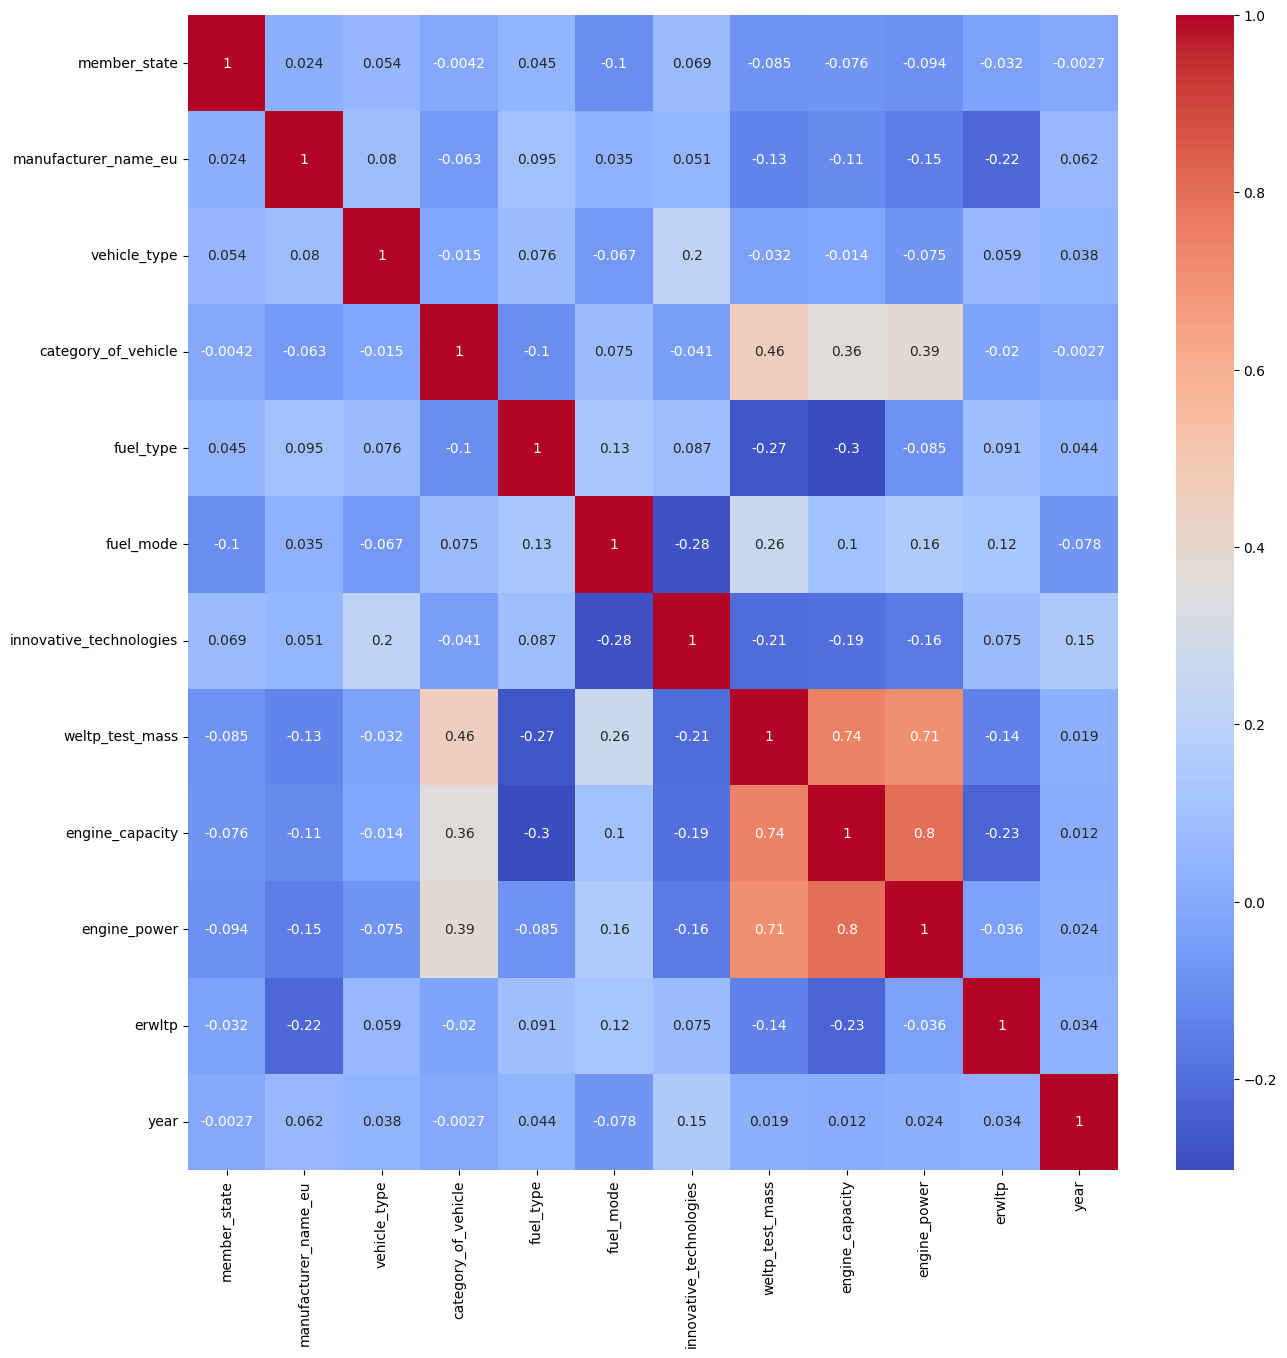

In [16]:
cor = X.corr()
fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

In [17]:
X.head()

,member_state,manufacturer_name_eu,vehicle_type,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,weltp_test_mass,engine_capacity,engine_power,erwltp,year
ID,,,,,,,,,,,,
56002959,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002960,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002961,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002962,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002963,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068


In [18]:
X.isna().sum()

member_state               0
manufacturer_name_eu       0
vehicle_type               0
category_of_vehicle        0
fuel_type                  0
fuel_mode                  0
innovative_technologies    0
weltp_test_mass            0
engine_capacity            0
engine_power               0
erwltp                     0
year                       0
dtype: int64

In [19]:
# Split the data in train and a test setz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [40]:
# Trying out LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# mean squared Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


score_train: 0.40115750230366165
score_test: 0.400398582375289
rmse training data:  31.89665327867576
rmse test data:  31.8825578984657


In [41]:
#trying out RidgeCV
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

alpha used: 10.0
score:  0.39962405231131815
score:  0.40038345060587377
rmse training data:  31.917261105886507
rmse test data:  31.903143265230263


In [42]:
#trying out lasso  regression
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


[-1.45331988e-01  6.13633460e-02 -1.41278213e-02  0.00000000e+00
 -4.62644935e+00 -1.41552145e+01 -7.62001120e-03 -1.22448403e+01
  0.00000000e+00  2.24089605e+01  8.50375788e-01 -0.00000000e+00]
alpha used:  1.2705477228357498
score:  0.3901635014673601
score:  0.3907637812553151
rmse training data:  32.17226727730903
rmse test data:  32.153521035666074


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

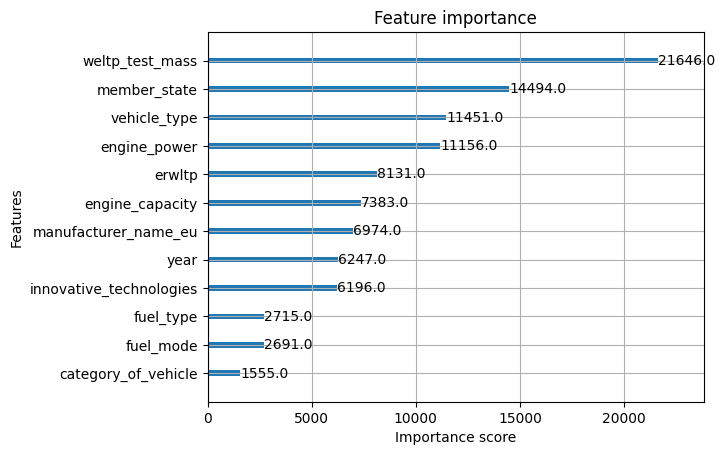

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, learning_rate =0.3,   max_depth=7, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

xgb.plot_importance(model, ax = plt.gca())




In [46]:

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
print("score: ", sc_train)
print("score: ", sc_test)

# mean squared Error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_te = np.sqrt(mean_squared_error(y_pred_test, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

score:  0.9967100660898573
score:  0.9965820237807083
rmse training data:  2.3641901189963757
rmse test data:  2.4071677146392383


In [20]:
# reducing data to 10 percent of the data due to computation time
batch_size= int(0.1*X_train.shape[0])
X_train_batch= X_train[:batch_size]
y_train_batch=y_train[:batch_size]

explained variance:  [6.42459249e+04 2.84463534e+03 7.57583476e+02 4.81582600e+01
 6.82308887e+00 2.24740102e+00 9.94960747e-01 9.25795541e-01
 4.77960982e-01 2.53171420e-01 1.48611944e-01 3.21840762e-02]


Text(0, 0.5, 'Eigenvalues')

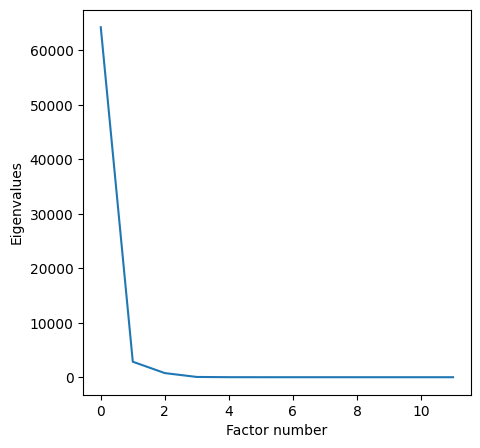

In [23]:
# for runtime reasons I try a dimensionreduction with PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_batch_re = pca.fit_transform(X_train_batch)
print("explained variance: ", pca.explained_variance_)

plt.figure(figsize = (5,5))
plt.plot(range(X_train_batch.shape[1]),pca.explained_variance_)
plt.xlabel("Factor number")
plt.ylabel("Eigenvalues")

In [ ]:
# gridSearch für verschiedene Modelle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Modelle und ihre Hyperparameter definieren
models = {
    'XGBRegressoer': (XGBRegressor(), {'n_estimators': [10, 100, 500, 1000], 'learning_rate': [0.1, 0.3, 0.5]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]})
}

# Ergebnisse speichern
results = {}

# Grid-Search für jedes Modell durchführen
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }

In [ ]:
# Grid-Search für jedes Modell durchführen
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Beste Hyperparameter: {result['best_params']}")
    print(f"  Bester Score (MSE): {result['best_score']:.4f}\n")

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ergebnisse ausgeben
results={}

# Modelle und ihre Hyperparameter definieren
models = {
    'XGBRegressoer': (XGBRegressor(), {'n_estimators': [10, 1000], 'learning_rate': [0.1, 0.3, 0.5]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]})
}

# Randomized Search to save computation power
for model_name, (model, params) in models.items():
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs = 2)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }


c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Ergebnisse ausgeben
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Beste Hyperparameter: {result['best_params']}")
    print(f"  Bester Score (MSE): {result['best_score']:.4f}\n")
